In [2]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
#datapath = ('/Users/jasonpaik9/Documents/Thinkful/Bootcamp/Unit 3/recipe/epi_r.csv')
datapath = ('/Users/Jason Paik/My Documents/Data Science/U3L4_SVMChallenge-master/epi_r.csv')
data = pd.read_csv(datapath)

In [3]:
data.rating.describe()

count    20052.000000
mean         3.714467
std          1.340829
min          0.000000
25%          3.750000
50%          4.375000
75%          4.375000
max          5.000000
Name: rating, dtype: float64

In [4]:
data1 = data

In [5]:
## Dropped columns that had NAN values that created errors in my analysis. These values may be important
## but they caused too many problems in my analysis to make it worthwhile to clean.
data1 = data1.drop(columns=['title','calories','protein','fat','sodium'])

In [6]:
## Created a binary outcome variable against the rating column - anything that is 3.76 and above will create a 1
## as a satisfactory rating and below 3.76 will create a 0 as a below-average rating (3.75 is the mean)
data1['ratingBinary'] = data1['rating']
data1.loc[data.rating >= 3.76, 'ratingBinary'] = 1
data1.loc[data.rating < 3.76, 'ratingBinary'] = 0

In [7]:
data1.head()

,rating,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,30 days of groceries,advance prep required,alabama,alaska,alcoholic,...,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey,ratingBinary
0,2.500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,4.375,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,3.750,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,5.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,3.125,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
## Using the SKLearn.feature_selection package, I selected the top 30 K Best features against the ratingBinary column
## I then projected this to show it through the chi^2 test

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
Y = data1.iloc[:,-1]
X = data1.loc[:, (data1.columns != 'ratingBinary')]
bestfeatures = SelectKBest(score_func=chi2, k=30)
fit = bestfeatures.fit(X,Y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
## Concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  # Naming the dataframe columns
print(featureScores.nlargest(30,'Score'))  # Print 30 best features

                 Specs        Score
0               rating  4172.478274
278     house & garden   168.736737
187              drink   130.854678
9            alcoholic   114.406372
58         bon appétit   100.806123
236                gin   100.128167
521              roast    87.120913
617       thanksgiving    83.703405
135     cocktail party    76.283693
180             dinner    67.082465
581             spirit    64.501838
125          christmas    56.284523
51             bitters    55.865868
575           soy free    51.798720
454        peanut free    50.641030
252     grill/barbecue    49.678538
344            low fat    46.345607
31        backyard bbq    43.456861
134           cocktail    41.317475
205               fall    36.940820
251              grill    35.906342
594  stuffing/dressing    35.891319
263      harpercollins    35.737446
447              pasta    35.436904
527                rum    34.444240
238        goat cheese    33.527695
625      tree nut free    29

In [26]:
## Re-created a new dataframe through the top 30 columns through copy function
data2 = data1[['rating','ratingBinary','house & garden','drink','alcoholic', 'bon appétit', 'gin','roast','thanksgiving',
                 'cocktail party','dinner','spirit','christmas','bitters','soy free','peanut free','grill/barbecue',
                 'low fat','backyard bbq','cocktail','fall','grill','stuffing/dressing','harpercollins','pasta',
                 'rum','goat cheese','tree nut free','stir-fry','vegan','father\'s day']].copy()

In [27]:
data2.head()

,rating,ratingBinary,house & garden,drink,alcoholic,bon appétit,gin,roast,thanksgiving,cocktail party,...,grill,stuffing/dressing,harpercollins,pasta,rum,goat cheese,tree nut free,stir-fry,vegan,father's day
0,2.500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4.375,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.750,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,5.000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,3.125,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
## Tried out a different method to look into PCA analysis - difficult to understand..
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
fit_PCA = pca.fit(X)
#print("Explained Variance: %s") % fit.explained_variance_ratio_
print(fit_PCA.components_)

[[-9.69335168e-01 -7.64148364e-05 -4.17989778e-05 ...  1.04601905e-03
   1.36910416e-04 -1.08975685e-03]
 [-2.16272374e-01  2.71324163e-04  5.38386940e-05 ...  1.35740174e-04
   2.32165344e-04 -1.16589174e-02]
 [ 6.07940595e-03  8.62374035e-04 -3.12485792e-05 ...  5.44266628e-04
   5.19174202e-04 -1.19357360e-02]]


[4.67832000e-01 1.85876962e-05 1.00246234e-05 4.90476617e-05
 2.22545024e-04 4.21127475e-05 5.02436015e-04 1.99429251e-05
 3.82718781e-05 1.54038798e-03 1.67283385e-03 2.73041333e-04
 2.17203036e-04 7.36561791e-04 5.55623870e-04 8.66838271e-06
 6.13042222e-05 2.67640432e-03 2.26621660e-03 3.22332680e-05
 1.02001412e-03 7.18584685e-05 8.47592201e-04 9.21915776e-04
 9.35606467e-05 9.38941611e-04 0.00000000e+00 3.76854825e-05
 2.52334774e-05 7.53120389e-04 7.71590699e-04 2.21070143e-03
 2.08553874e-03 4.85329733e-03 9.53835301e-04 2.36007347e-04
 1.86187422e-03 5.53293446e-04 2.59949890e-04 1.80513795e-03
 2.21550044e-03 3.66835158e-04 1.95955311e-04 3.30744045e-04
 7.01804313e-04 1.01312759e-03 2.30235182e-03 1.58738242e-03
 0.00000000e+00 7.76768271e-04 2.50236675e-05 5.54154431e-04
 5.90072304e-04 2.11454734e-03 9.08255580e-04 9.12656122e-04
 1.68389635e-03 2.97036956e-04 7.79191314e-03 5.04264596e-05
 5.08016729e-05 6.76981691e-04 1.05628318e-03 1.54586028e-05
 1.08820553e-03 1.633786

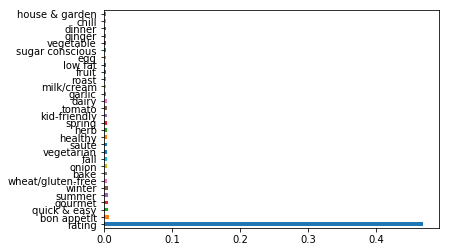

<Figure size 576x432 with 0 Axes>

In [16]:
## Tried a feature importance classifier through ExtraTreesClassfier on SKLearn
## Gave me simliar columns to the SelectKBest but also some slightly different ones
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X,Y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(30).plot(kind='barh')
plt.figure(figsize=(8, 6))
plt.show()

In [22]:
feat_importances.nlargest(31)

rating               0.467832
bon appétit          0.007792
quick & easy         0.006206
gourmet              0.005935
summer               0.005614
winter               0.005439
wheat/gluten-free    0.004910
bake                 0.004853
onion                0.004632
fall                 0.004532
vegetarian           0.004442
sauté                0.004379
healthy              0.004247
herb                 0.004215
spring               0.004093
kid-friendly         0.004014
tomato               0.003955
dairy                0.003935
garlic               0.003924
milk/cream           0.003746
roast                0.003715
fruit                0.003693
low fat              0.003679
egg                  0.003595
sugar conscious      0.003555
vegetable            0.003537
ginger               0.003465
dinner               0.003448
chill                0.003393
house & garden       0.003356
side                 0.003258
dtype: float64

In [23]:
data3 = data1[['rating','ratingBinary','bon appétit', 'quick & easy', 'gourmet','summer', 'winter', 
                   'wheat/gluten-free', 'bake', 'onion', 'fall', 'vegetarian', 'sauté', 'healthy', 'herb', 'spring',
                   'kid-friendly', 'tomato', 'dairy', 'garlic', 'milk/cream', 'roast', 'fruit', 'low fat', 'egg',
                   'sugar conscious', 'vegetable', 'ginger', 'dinner', 'chill', 'house & garden', 'side']].copy()

In [44]:
Y1 = data2.ratingBinary
X1 = data2.loc[:, (data2.columns != 'ratingBinary')]
Y2 = data3.ratingBinary
X2 = data3.loc[:, (data3.columns != 'ratingBinary')]

In [33]:
## SKLearn, Chi^2 Test - accuracy is around 74-75%
from sklearn.svm import SVR
svr = SVR()
svr.fit(X1,Y1)
svr.score(X1, Y1)
from sklearn.model_selection import cross_val_score
cross_val_score(svr, X1, Y1, cv=5)

array([0.7514304 , 0.75700649, 0.74021161, 0.74120287, 0.75622354])

In [45]:
## ExtraTreesClassifer - accuracy is also around 74-75%
svr1 = SVR()
svr1.fit(X2,Y2)
svr1.score(X2, Y2)
cross_val_score(svr1, X2, Y2, cv=5)

array([0.75315656, 0.76152783, 0.7536385 , 0.74424964, 0.76868857])

### Conclusion

What was interesting about this analysis was that the top 30 recipes included ingredients that seemed health-conscious and allergy-sensitive. And actually in the SelectKBest analysis, we saw recipes that were heavy on the alcohol so both feature selection techniques produced different outcomes. In the inclusion of alcohol, a lot of these recipes became less about "garlic" or "olive oil" - ingredients that were uniform or widely accepted in cooking - but with items that might have been "surpringly" tasteful. For example - most "gluten-free" recipes you would associate a dietary restriction to be compromising to the overall taste but to have it work in favor of your restriction and taste good might include a biased review because of that surprise element. Most of the ingredients fall into this biased assumption such as "quick and easy" and "kid-friendly".